# Data spaces thesis  
### Tabacaru Raluca Gariebla s267581

In [92]:
#pip install -U imbalanced-learn
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,  f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from collections import Counter

# Table of contents
1. [The Dry Bean Dataset](#introduction)
2. [Data Analysis ](#dataset)  
    2.1 [The dataset's content](#content)  
    2.2 [Description of features](#features)  
    2.3 [Descriptive statistics ](#statistics)  
    2.4 [Missing values](#missing)  
    2.5 [Features distribution](#distribution)  
    2.6 [Target analysis](#target)  
3. [Pre-Processing](#Pre-Processing)  
    3.1 [Prediction features division](#division)  
    3.2 [Train-test split](#split)  
    3.3 [Data Rescaling](#normalization)  
    3.4 [Dimensionality reduction](#DimReduction)  
    3.5 [PCA](#PCA)  
4. [Model Generation](#ModelGen)  
    4.1 [Validation procedure](#validation)  
    4.2 [Metrics](#metrics)  
    4.3 [K-Nearest Neighbors](#KNN)  
    4.4 [Decision Trees](#DT)  
    4.5 [Random Forset](#RF)  
    4.6 [SVM](#SVM)   
    4.7 [Multinomial Logistic Regression](#MLR)  
    4.8 [Results](#res) 
5. [Conclusions](#end)
    

## 1. Introduction<a name="introduction">  

A team of Faculty of Technology, Selcuk University, TURKEY, created the Dry Been Dataset from 13,611 images of grains. They extract a total of 16 features such as form, shape, type, and structure by the market situation. The dataset is available at: <https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset>


This thesis aims to classify different types of dry beans based on this dataset, of which a few observations are shown below.


In [38]:
df = pd.read_excel("./DryBeanDataset/Dry_Bean_Dataset.xlsx")
df.head()  

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## 2. Data Analysis  <a name="dataset">  

### 2.1  The dataset's content  <a name="content">

The dataset size is:

In [39]:
print(df.shape)
print("Number of samples:", df.shape[0])
print("Number of features:", df.shape[1])

(13611, 17)
Number of samples: 13611
Number of features: 17


The dataset features are:

In [40]:
featureNames = list(df)
print(featureNames)

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


### 2.2 Description of features <a name="features">
    
1. Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)  

The Class attribute is the target 

### 2.3 Descriptive statistics <a name="statistics">

A few statistics can be derived from the dataset using the "describe" method which provides this information:  

- count: the number of elements present in each feature;
- mean: the average of a feature;
- std: the standard deviation of observation;
- min: the minimum value of the feature;
- 25%: the 25 percentile;
- 50%: the 50 percentile;
- 75%: the 75 percentile;
- max: the maximum value of the feature.

Below is a summary table with the data:


In [41]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


### 2.4 Missing values <a name="missing">

In order to implement algorithms correctly, it is important to identify whether any values are missing in the dataset. In the event that they were present, this would require a correction to prevent the problem. The simplest solution is, for example, to remove them from the dataset.

In [42]:
missing = df.isnull().sum()

if missing.sum() == 0:
    print("In this dataset there are no missing values.")
else:
    print(f"In this dataset there are some missing values:{missing}")

In this dataset there are no missing values.


### 2.5 Features distributions <a name="distribution">  

Below is a visual representation of the distribution of features within the dataset:


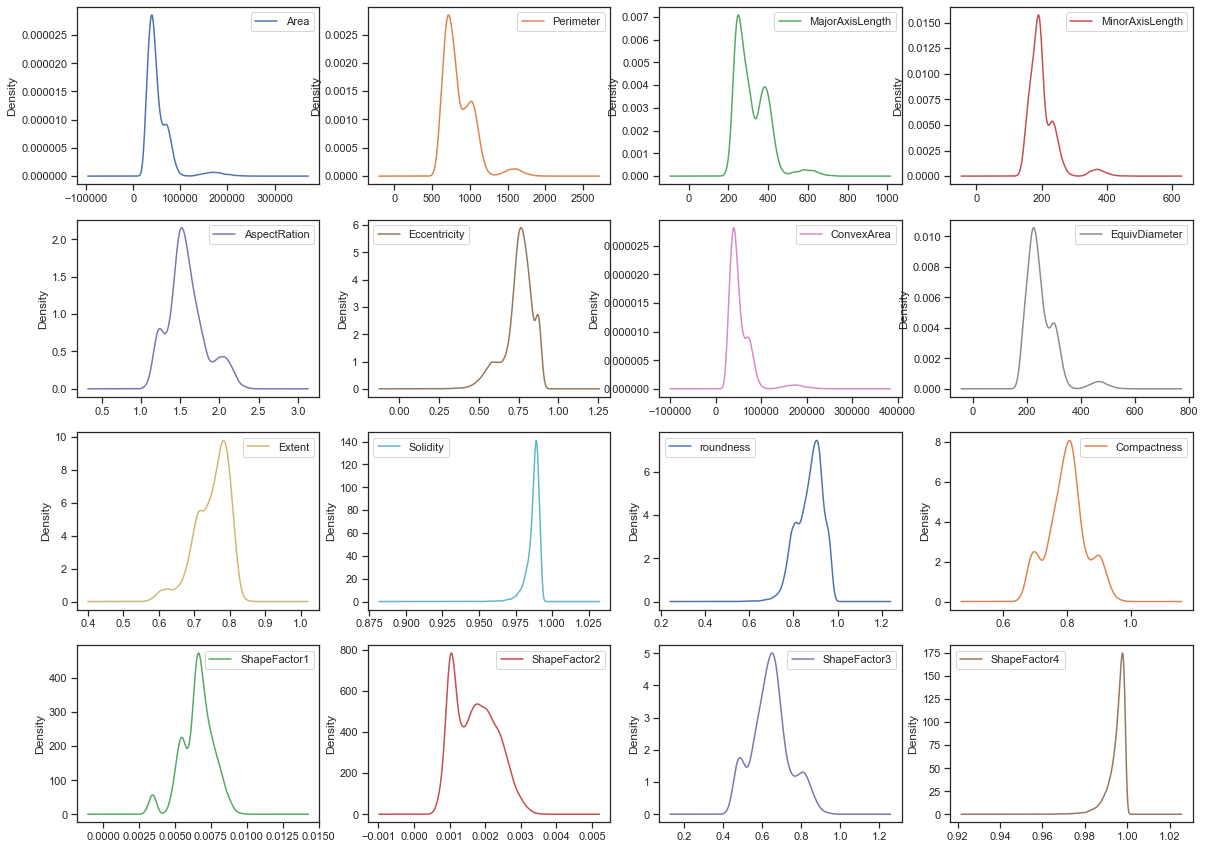

In [43]:
features = df.drop(columns="Class")
features.plot(kind='density', subplots=True, layout=(4,4), figsize=(20,15), sharex=False, sharey=False)
plt.show()

The box plot is a great way to show data distributions in a compact and effective way. Statistical summaries can be visualized and possible outliers can be highlighted. Outliers are anomalous observations that are numerically distant from the rest of the data. In a box plot, an outlier represents a data point that occurs outside its whiskers.

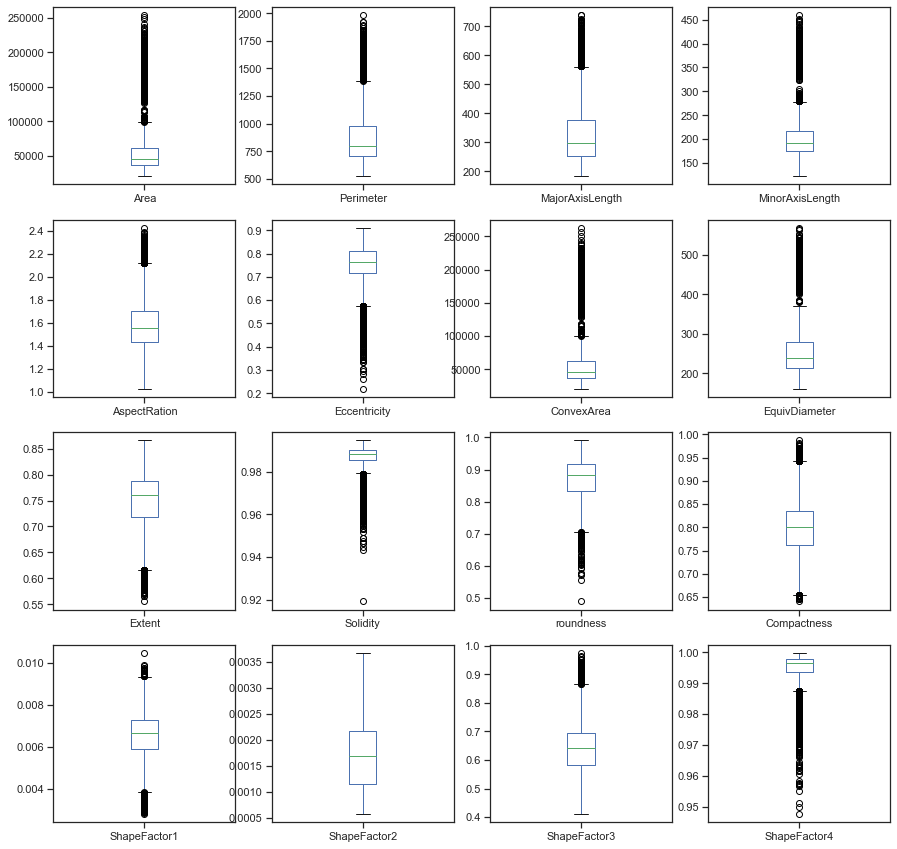

In [44]:
features.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15), sharex=False, sharey=False)
plt.show()

A correlation matrix is a table that shows the correlation coefficients among sets of variables. In the correlation matrix, the values lie between -1 and +1. Values close to -1 are interpreted as negative correlations, values close to +1 are interpreted as positive correlations. If the value is close to 0, it indicates that there is no connection between these two variables.  

corr() function from Pandas library calculates the Pearson's correlation coefficient between each features (i and j), which is defined as:
$$ \rho_{ij} =\frac{\operatorname{cov}(X_i,X_j)}{\sigma_{X_i}\sigma_{X_j}} $$
where:  
$\operatorname{cov}(X_i,X_j)$ is the covariance   
$\sigma_{X_i}$ is the standard deviation of  $X_i$  
$\sigma_{X_j}$ is the standard deviation of  $X_j$   

The covariance between 2 variables is defined as:
$$\operatorname{cov}(X_i,X_j) = \operatorname{E}[(X_i-\mu_{X_i})(X_j-\mu_{X_j})] = \operatorname{E}[X_i X_j]- \operatorname{E}[X_i]\operatorname{E}[X_j]$$  
where:  
$\mu_{X_i}$  is the mean of $ X_i $  
$\mu_{X_j}$ is the mean of  $ X_j $  
$\operatorname{E}$ is the Expected Value   

In case of two equal statistical variables, we can get:

$$\rho_{ii}=\frac{\operatorname{cov}(X_i,X_i)}{\sigma_{X_i}\sigma_{X_i}}=\frac{\sigma_{X_i}^2}{\sigma_{X_i}\sigma_{X_i}} =1$$






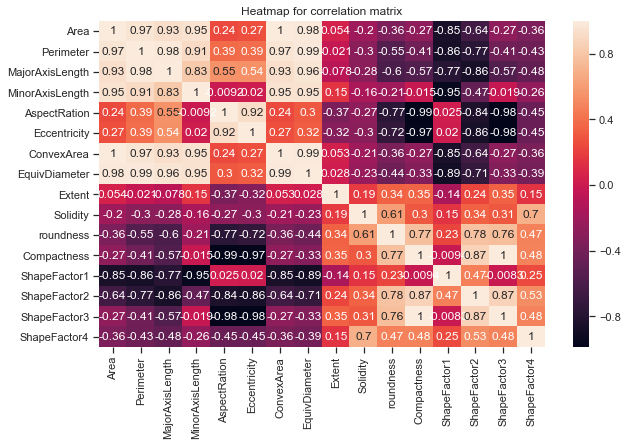

In [45]:
corrMatrix = df.corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(corrMatrix, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title("Heatmap for correlation matrix")
plt.show()

### 2.6 Target analysis<a name="target">

In [46]:
print('The target classes are:')
df.Class.unique()

The target classes are:


array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

<BarContainer object of 7 artists>

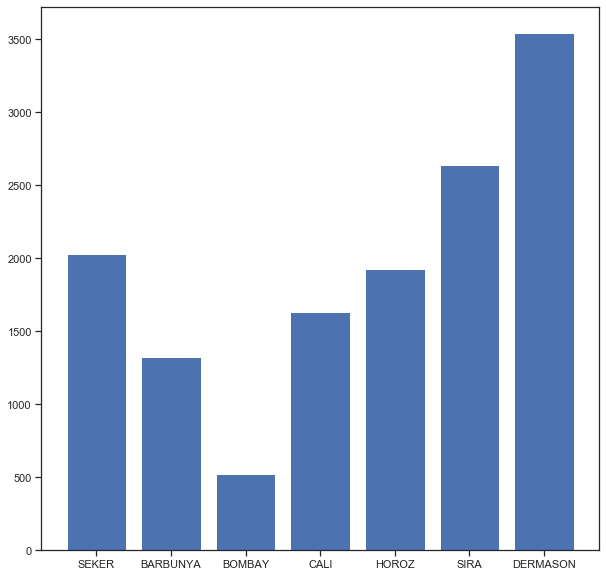

In [93]:
# summarize distribution
counter = Counter(df.Class)
x = np.arange(len(counter.keys()))
plt.figure(figsize=(10,5))
plt.xticks(x, counter.keys())
plt.bar(x, counter.values(),width=0.8)

Since the dataset is imbalanced because it has an unequal class distribution. Instead to use oversampling or undersampling technique it was set the class_weight parameter to 'balanced', exept for KNN. In this way, the model automatically adjusts weights inversely proportional to class frequencies in the input data.  
This process was performed for all models, except for KNN which does not have this setting.  
Undersampling is an approach to randomly resampling an imbalanced dataset, which deletes examples from the majority class, instead, oversampling duplicates the examples from the minority class.

## 3. Pre-Processing <a name="Pre-Processing">

### 3.1 Prediction features division <a name="division">
First, it is necessary to divide the target column from the rest. Both the model learning process and the test use the target value. In our dataset, the target value is expressed by the Class feature.

In [48]:
X = df.drop(columns=['Class']).values
Y = df['Class'].values

### 3.2 Train-test split <a name="split">
Machine learning algorithms typically perform a train-test split to gauge their performance.  
A dataset is divided into two subsets. The first subset is used to fit the model and is called the training dataset. The second subset is used to evaluate the fit machine learning model and it is referred to as the test dataset.   
As a first attempt, the dataset was divided into 2/3 training dataset and 1/3 test dataset.  

The division is performed using the train_test_split library function that, given a proportion of test set size to training set size, returns the divided dataset. To have samples randomly selected from the dataset, random_state = 1 was set. This way, the training and test datasets contain a wide variety of classes.


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=1)


print("The size of the training set is:", len(X_train))
print("The size of the test set is:", len(X_test))

The size of the training set is: 9119
The size of the test set is: 4492


### 3.3 Data Rescaling <a name="normalization"> 
    
Since data contain attributes with scales for many quantities. Data attributes should be of equal scale for machine learning algorithms to work effectively. Standardization and normalization are two popular methods for scaling data. 

The normalization process involves scaling numeric attributes from 0 to 1 according to their real values.  

Standardization involves adjusting the distribution of each attribute to have a mean value of zero and a standard deviation value of one.
  
Below is the box plot of the features, so that we can see the effect of data rescaling.  

Also this transformation was applied to all algorithms except for Regression Tree and Random Forest, because they do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

In [63]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)


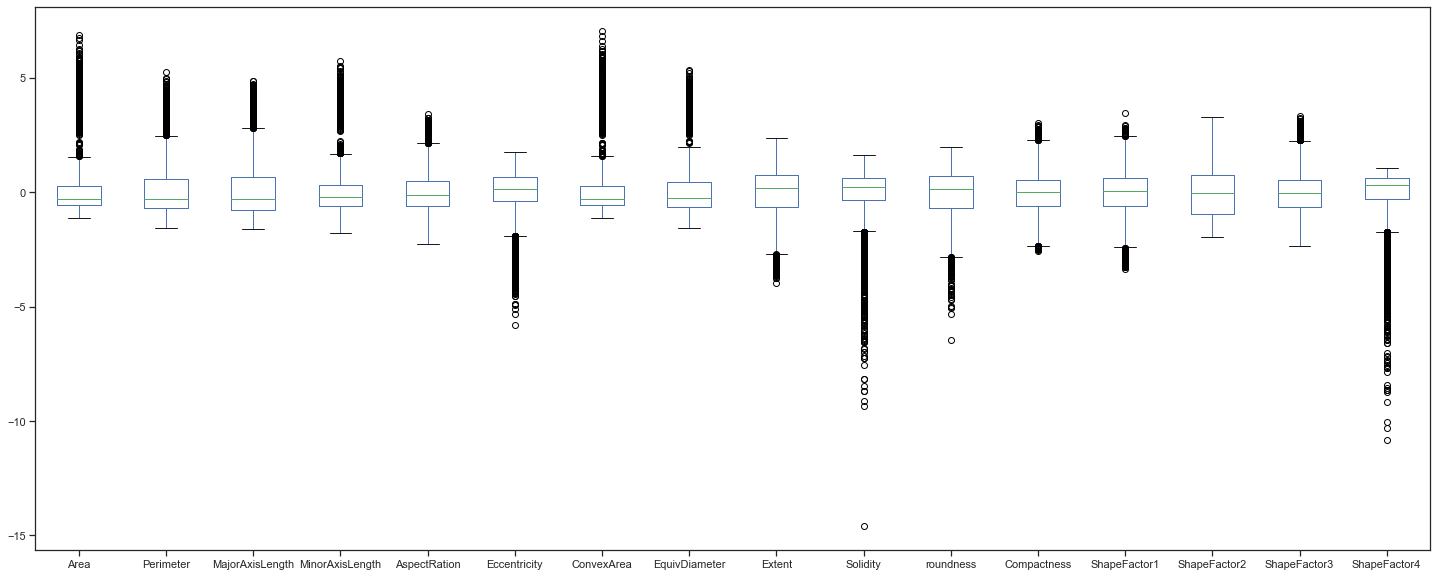

In [51]:
features = df.drop(columns="Class")
features[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']] = scaler.fit_transform(features[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']])
features.plot(kind='box', figsize=(25,10))
plt.show()

### 3.4 Dimensionality reduction <a name="DimReduction"> 
The performance of machine learning algorithms can degrade with too many input variables. Having a large number of dimensions in the feature space can mean that the volume of that space is quite large, as a result, the points that we have in that space often represent a small and non-representative sample.  
It can seriously affect the performance of machine learning algorithms fit on data with many input features, generally referred to as the “curse of dimensionality.” Therefore, it is often desirable to reduce the number of input features. This reduces the number of dimensions of the feature space, hence the name “dimensionality reduction”. One way to do this is Principal Component analysis (PCA)




### 3.5 PCA <a name="PCA"> 
Principal Component analysis reduces high dimensional data to lower dimensions while capturing maximum variability of the dataset.  
PCA allows us to go a step further and represent the data as linear combinations of principal components.   
The first principal component is computed so that it explains the greatest amount of variance in the original features. The second component is orthogonal to the first, and it explains the greatest amount of variance left after the first principal component. 

In [52]:
def plotPCACumulativeExplainedVariance(pca):
    plt.figure(figsize=(12,8))
    plt.bar(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='orange')
    #print(pca.explained_variance_ratio_.cumsum())
    plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
    plt.title('Explained variance by different principal components')
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance in percent')
    plt.show()

In [53]:
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='SEKER':
            cols.append('black')
        elif l=='BARBUNYA':
            cols.append('blue')
        elif l == 'BOMBAY':
             cols.append('cyan')
        elif l == 'CALI':
             cols.append('magenta')
        elif l == 'HOROZ':
             cols.append('yellow')
        elif l == 'SIRA':
             cols.append('red')
        else:
            cols.append('green')
    return cols


In [54]:
def plotPCABiplot(score, y, coeff, labels=None):
    plt.figure(figsize=(12,8))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    # Create the colors list using the function above
    colors =cols=pltcolor(y) 
    plt.scatter(xs * scalex,ys * scaley, c=colors )
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.title('PCA biplot')
    plt.show()

In [55]:
def makePCA(X_train_, Y_train_, X_test_, labels=None):
    pca = PCA(n_components=.95)
    pca.fit(X_train_)
    X_train_pca_ = pca.transform(X_train_)
    X_test_pca_ = pca.transform(X_test_)
    
    pca_full = PCA()
    pca_full.fit(X_train_)
    X_train_pca_full_ = pca_full.transform(X_train_)
    #print(pca_full.components_[0])
    #print(pca_full.components_[2])
    
    plotPCACumulativeExplainedVariance(pca_full)
    plotPCABiplot(X_train_pca_full_[:,0:2], Y_train_, np.transpose(pca_full.components_[0:2,:]), labels)
    
    return X_train_pca_, X_test_pca_

The first plot shows the explained variance ratio. The orange bars show the percentage variance explained by each principal component. The blue line shows the cumulative sum. The first principal component explains 55% of the variance of the data set. The first 2 principal components explain 81%, the first 3 explain 89%, and so on.

I may decide that I want to preserve 95% of the variance in my modeling, so I would keep the first five principal components, explaining 97% of the variance.

An example of a PCA biplot is shown as a combination of a loading plot and a score plot. PCA score plot is a scatter plot of the scores resulted from PCA. The score is the distance between the origin and the 90° projection of a sample along the principal component direction. Only the two first components are displayed in this case, to create a two-dimensional graph. The dots are coloured according to the target value (defined by pltcolor function). The loading plot, instead, measures how much each feature influences the principal component. The projection of a vector on a component represents how much weight the corresponding feature has on that component. Moreover, the angle between the vectors indicates their correlation: the closer the vectors are, the higher their positive correlation; perpendicular vectors indicate no correlation; a large angle (close to 180°), means a negative correlation.

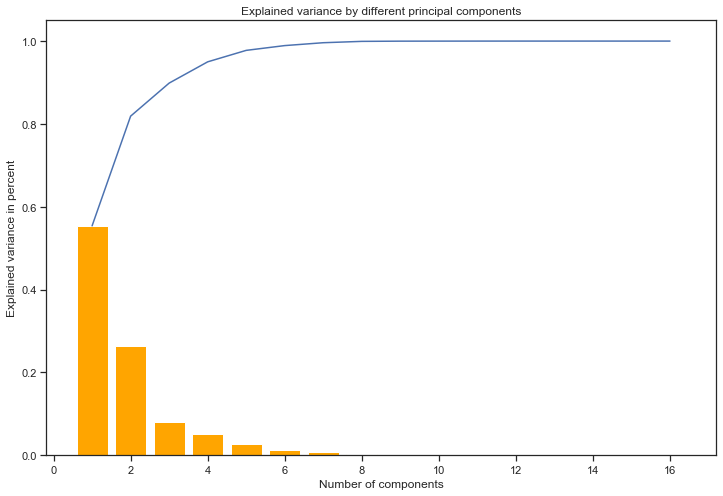

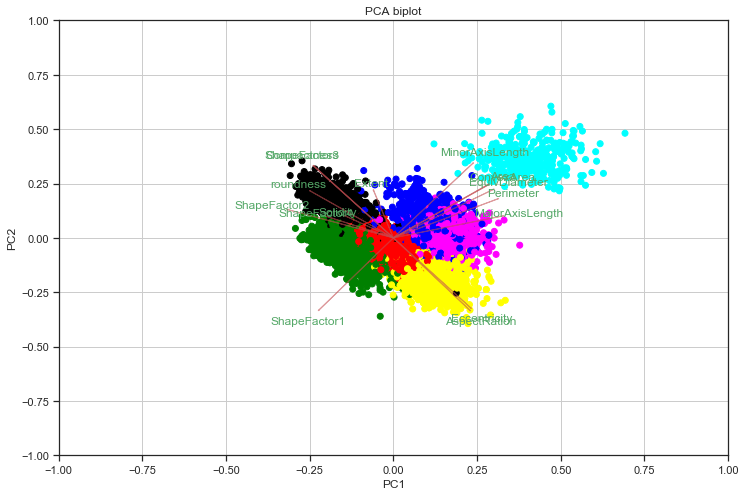

In [58]:
X_train_pca, X_test_pca = makePCA(X_train_s, Y_train, X_test_s, featureNames)

## 4. Model Generation <a name="ModelGen"> 
    
## 4.1 Validation procedure <a name="validation">
In order to select the hyperparameters of algorithms, it needs to use a validation procedure. There are two types of validation:

- Hold out: the training set is divided into two parts, one for training and another one for model validation to understand if those hyperparameters are better than others. Usually for division between training and validation set the following proportion is used: ⅔ for the training and ⅓ for the validation set. Methodologies like this work well when you have a lot of data and want to validate models quickly, but aren't very accurate;
- K-fold: this technique allows the validation of models more accurately. In doing so, a GridSearchCV object was used, which performs resampling of machine learning models on a limited set of training data using Cross-validation, which is a technique used to evaluate models.  
Generally, the procedure is as follows:  
    1. Randomly shuffle the dataset.  
    2. Split the dataset into k groups  
    3. For each unique group:  
        3.1 Take the group as a test data set  
        3.2 Take the remaining groups as a training data set  
        3.3 Fit a model on the training set and evaluate it on the test set  
        3.4 Retain the evaluation score and discard the model  
    4. Return the best configuration of parameters    

The figure above summarizes the process  
<img src="./img/grid_search_cross_validation.png" alt="grid_search_cross_validation" width="400"/>

Following the validation procedure, the validation and the train set are combined to be able to train using the best hyperparameters. When the training is done, it is time to see how good the model is with data that it has never seen before, so it is tested on the test set.  

This process was applied to all models.

### 4.2 Metrics <a name="metrics">
The metrics used to evaluate our models are:  
    
- Accuracy: Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.  It is most used when all the classes are equally important.
 
$$Accuracy = (TP+TN)/(TP+FP+FN+TN)$$
TP, TN, FP and TN are described by following table:
<img src="./img/matrix.png" alt="matrix" width="300"/>

- F1 Score: The F1 score is a number between 0 and 1 and is the harmonic mean of precision and recall. F1-score is a better metric when there are imbalanced classes. 
$$F_1 = 2 \frac{precision * recall}{precison + recall} = \frac{TP}{TP+\frac{1}{2}(FP+FN)} $$

### 4.3 K-Nearest Neighbors <a name="KNN"> 

The k-nearest neighbors (KNN) algorithm is a supervised machine learning algorithm that assumes that similar things exist in close proximity.  
For each point $xi$ the algorithm perfroms: 
1. Calculate $d(x, xi)$  
2. Sort the calculated distances in ascending order based on distance values  
3. Get top k rows from the sorted array  
4. Get the most frequent class of these rows  
5. Return the predicted class  

where $d$ denotes the Euclidean distance or Manhattan distance between the points.
$$ L_p(x,y)=(\sum_{i=1}^I(x_i−y_i)^p)^{\frac{1}{p}}$$

p = 1 defined the Manhattan distance   
p = 2 defined the Euclidean distance

To select the K that’s right for your data, a GridSearchCV object was used to perform the KNN algorithm several times with different values of the number of closed neighbor and different metrics (manhattan_distance and euclidean_distance in this case ). In the end, the best set of parameters, that reduces the number of errors and has the highest accuracy, was returned.




In [64]:
def knn_classifier(X_train_, Y_train_, X_test_, Y_test_):
    knn = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid={'n_neighbors': [1, 3, 5, 7, 9, 13, 15, 17, 19], 'p': [1, 2]},
                                cv=10, n_jobs=2)
    knn.fit(X_train_, Y_train_)
    print("Best parameters: ", knn.best_params_)
    Y_predict = knn.predict(X_test_)
    knn_ac = accuracy_score(Y_test,Y_predict)
    print('Accuracy:', knn_ac)
    knn_f1_score = f1_score(Y_test, Y_predict, average='weighted')
    print('F1 score:', knn_f1_score)
    
    return knn_ac, knn_f1_score

##### Without PCA:

In [109]:
knn_accuracy, knn_f1_score = knn_classifier(X_train_s, Y_train, X_test_s, Y_test)

Best parameters:  {'n_neighbors': 9, 'p': 2}
Accuracy: 0.9238646482635797
F1 score: 0.924047687020833


##### With PCA:

In [110]:
knn_accuracy_pca, knn_f1_score_pca = knn_classifier(X_train_pca, Y_train, X_test_pca, Y_test)

Best parameters:  {'n_neighbors': 9, 'p': 2}
Accuracy: 0.9227515583259127
F1 score: 0.9229231455904694


### 4.4 Decision Trees <a name="DT"> 

Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions. It split the training set into subsets, placing the best attribute of the dataset at the root of the tree. This procedure is repeated until it finds leaf nodes in all the branches of the tree. The whole training set is considered the root at the beginning.  

In Decision Tree, the major challenge is the identification of the attribute for the root node in each level. The process is known as attribute selection. The two popular attribute selection measures:  

1. Information Gain is applied to quantify which feature provides maximal information about the classification by measuring the size of impurities based on the notion of entropy, generally, aiming to reduce the amount of entropy from the top (root) to the bottom (leaves). The formula for Entropy is given below:
$$Entropy = \sum_{i=1}^I p_i log{_2}{p_i} $$
Where $p_i$ is the probability that a target feature takes a specific value.
2. Gini Index, also known as Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. If all the elements are linked with a single class then it can be called pure. Mathematically, the Gini Index can be expressed as:
$$Gini Index = \sum_{i=1}^I p_i (1-p_i)$$
Where $p_i$ denotes the probability of an element being classified for a distinct class.


For the algorithm construction, a stopping rule and a split evaluation criterion can be defined as 'max_depth': [1, 2, 3, 5, 10, 15, 20] 



In [96]:
def tree_classifier(X_train_, Y_train_, X_test_, Y_test_,class_weight = 'balanced'):
    dt = GridSearchCV(estimator=tree.DecisionTreeClassifier(class_weight=class_weight),
                                param_grid={'criterion':['gini', 'entropy'],
                                           'max_depth': [1, 2, 3, 5, 10, 15, 20]},
                                cv=10, n_jobs=2)
    dt.fit(X_train_, Y_train_)
    print("Best parameters: ", dt.best_params_)
    Y_predict = dt.predict(X_test_)

    dt_ac = accuracy_score(Y_test,Y_predict)
    print('Accuracy:',dt_ac)    
    dt_f1_score = f1_score(Y_test, Y_predict, average='weighted')
    print('F1 score:', dt_f1_score)
    
    return dt_ac, dt_f1_score
    

##### Without PCA:

In [99]:
dt_accuracy, dt_f1_score = tree_classifier(X_train, Y_train, X_test, Y_test)

Best parameters:  {'criterion': 'gini', 'max_depth': 10}
Accuracy: 0.9029385574354408
F1 score: 0.9030353808920514


##### With PCA:

In [114]:
dt_accuracy_pca, dt_f1_score_pca = tree_classifier(X_train_pca, Y_train, X_test_pca, Y_test)

Best parameters:  {'criterion': 'gini', 'max_depth': 10}
Accuracy: 0.9047195013357079
F1 score: 0.9049278839641082


### 4.5 Random Forset  <a name="RF"> 
Random forests is a supervised learning algorithm. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.    
For the algorithm construction, a stopping rule and a split evaluation criterion can be defined as 'max_depth': [1, 2, 3, 5, 10, 15, 20]

In [100]:
def randomForest_classifier(X_train_, Y_train_, X_test_, Y_test_, class_weight = 'balanced'):

    rf = GridSearchCV(estimator=RandomForestClassifier(class_weight=class_weight),
                                param_grid={'max_depth' : [1, 2, 3, 5, 10, 15, 20],
                                            'criterion' :['gini', 'entropy']},
                                cv=10, n_jobs=2)
    rf.fit(X_train_, Y_train_)
    print("Best parameters: ", rf.best_params_)
    Y_predict = rf.predict(X_test_)

    rf_ac = accuracy_score(Y_test,Y_predict)
    print('Accuracy:',rf_ac)
    rf_f1_score = f1_score(Y_test, Y_predict, average='weighted')
    print('F1 score:', rf_f1_score)
    
    return rf_ac, rf_f1_score

##### Without PCA:

In [101]:
rf_accuracy, rf_f1_score = randomForest_classifier(X_train, Y_train, X_test, Y_test)

Best parameters:  {'criterion': 'gini', 'max_depth': 15}
Accuracy: 0.9254229741763135
F1 score: 0.9255477752294468


##### With PCA:

In [102]:
rf_accuracy_pca, rf_f1_score_pca = randomForest_classifier(X_train_pca, Y_train, X_test_pca, Y_test)

Best parameters:  {'criterion': 'entropy', 'max_depth': 15}
Accuracy: 0.9254229741763135
F1 score: 0.9255083481479516


### 4.6 SVM  <a name="SVM"> 
SVM is a supervised machine learning algorithm. 
The objective is to find a hyperplane in an n-dimensional space that separates the data points to their potential classes. The hyperplane should be positioned with the maximum distance to the data points. The data points with the minimum distance to the hyperplane are called Support Vectors. Due to their close position, their influence on the exact position of the hyperplane is bigger than that of other data points. In the graphic below the Support Vectors are the 3 points (2 blue, 1 green) laying on the lines.

<img src="./img/svm.png" alt="svm" width="400"/>

In this case the problem turns:
<img src="./img/svm_math.png" alt="svm_math" width="600"/>

The objective is to classify as many data points correctly as possible by maximizing the margin from the Support Vectors to the hyperplane while minimizing the term $w^Tw$ 
In other words, the objective can also be explained as finding optimal $w$ and $b$ that most samples are predicted correctly.
Mostly not all data points can be allocated perfectly so that a distance to the correct margin is represented by  $\zeta \,\!$.


The kernel of SVM converts the input data space into a higher-dimensional space using different kernel functions. In this analysis Radial Basis Function (RBF) and Sigmoid Function as kernel functions which are defined as:

$$k(x_i,x_j)_{rbf} =\exp(-\gamma||x_i - x_j||^2)$$
$$k(x_i,x_j)_{sigmoid} =\tanh(\alpha x^Ty+c ) $$


The multiclass problem is broken down to multiple binary classification cases, which is also called one-vs-one. In scikit-learn one-vs-one is not default and needs to be selected explicitly. One-vs-rest is set as default. It basically divides the data points in class x and rest. Consecutively a certain class is distinguished from all other classes.
The number of classifiers necessary for one-vs-one multiclass classification can be retrieved with the following formula (with n being the number of classes): $$\frac{n*(n-1)}{2}$$

In the one-vs-one approach, each classifier separates points of two different classes and comprising all one-vs-one classifiers leads to a multiclass classifier.


In [103]:
def svm_classifier(X_train_, Y_train_, X_test_, Y_test_,class_weight = 'balanced'):

    scv = GridSearchCV(estimator=svm.SVC(decision_function_shape = 'ovo', class_weight = class_weight),
                                param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 
                                            'gamma': [0.001, 0.01, 0.1, 1, 10], 
                                            'kernel': ['rbf', 'sigmoid']},
                                cv=10, n_jobs=2)
    scv.fit(X_train_, Y_train_)
    print("Best parameters: ", scv.best_params_)
    Y_predict = scv.predict(X_test_)

    svm_ac = accuracy_score(Y_test,Y_predict)
    print('Accuracy:',svm_ac)
    svm_f1_score = f1_score(Y_test, Y_predict, average='weighted')
    print('F1 score:', svm_f1_score)
    return svm_ac,svm_f1_score
    

##### Without PCA:

In [104]:
svm_accuracy,svm_f1_score = svm_classifier(X_train_s, Y_train, X_test_s, Y_test)

Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.9292074799643811
F1 score: 0.9294189477628966


##### With PCA:

In [105]:
svm_accuracy_pca, svm_f1_score_pca = svm_classifier(X_train_pca, Y_train, X_test_pca, Y_test)

Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.9280943900267141
F1 score: 0.9282866005827044


### 4.7 Multinomial Logistic Regression <a name="MLR"> 
Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also  In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function:
$$f(x) = \frac{L}{1 + e^{-k(x-x_0)}}$$

where:  
$x_0$, the $x$ value of the sigmoid's midpoint  
$L$, the curve's maximum value  
$k$, the logistic growth rate or steepness of the curve  


Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.
The LogisticRegression class can be configured for multinomial logistic regression by setting the “multi_class” argument to “multinomial” and the “solver” argument to a solver that supports multinomial logistic regression, such as ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’.
By default, the LogisticRegression class uses the L2 penalty with a weighting of coefficients set to 1.0. The weighting of the coefficients in the penalty can be set via the “C” argument.  
The “lbfgs”, “sag” and “newton-cg” solvers support multi_class classification learning a true multinomial logistic regression model, which means that its probability estimates should be better calibrated than the default “one-vs-rest” setting.

The “sag” solver uses Stochastic Average Gradient descent. It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.The “saga” solver is a variant of “sag” that also supports the non-smooth penalty="l1".   
The “lbfgs” is an optimization algorithm that approximates the Broyden–Fletcher–Goldfarb–Shanno algorithm, which belongs to quasi-Newton methods. The “lbfgs” solver is recommended for use for small data-sets but for larger datasets its performance suffers.

In [106]:
def logisticRegression_classifier(X_train_, Y_train_, X_test_, Y_test_,class_weight = 'balanced'):
    from sklearn.linear_model import LogisticRegression
    logisticRegression = GridSearchCV(estimator=LogisticRegression(multi_class='multinomial',class_weight = class_weight ),
                                param_grid={'solver':['newton-cg', 'sag', 'saga'], 
                                            'C': [0.001, 0.01, 0.1, 1, 10]
                                            },
                                cv=10, n_jobs=2)
    logisticRegression.fit(X_train_, Y_train_)
    print("Best parameters: ", logisticRegression.best_params_)
    Y_predict = logisticRegression.predict(X_test_)

    
    lr_ac = accuracy_score(Y_test,Y_predict)
    print('Accuracy:',lr_ac)
    lr_f1_score = f1_score(Y_test, Y_predict, average='weighted')
    print('F1 score:', lr_f1_score)
    
    
    return lr_ac, lr_f1_score

##### Without PCA:

In [107]:
lr_accuracy,lr_f1_score = logisticRegression_classifier(X_train_s, Y_train, X_test_s, Y_test)

Best parameters:  {'C': 1, 'solver': 'sag'}
Accuracy: 0.9198575244879786
F1 score: 0.9201207239724969


##### With PCA:

In [108]:
lr_accuracy_pca, lr_f1_score_pca = logisticRegression_classifier(X_train_pca, Y_train, X_test_pca, Y_test)

Best parameters:  {'C': 0.1, 'solver': 'newton-cg'}
Accuracy: 0.9194122885129118
F1 score: 0.9195875600902629


### 4.8 Results <a name="res"> 

In [111]:
def plotResult(accuracys, accuracys_pca , f1_scores, f1_scores_pca):    
    
    labels = ['Logistic Regression', 'Decisions Tree', 'Random Forest', 'SVM', 'K-NN']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(8,5))
    rects1 = ax.bar(x - width/2, accuracys, width, label='Without PCA')
    rects2 = ax.bar(x + width/2, accuracys_pca, width, label='PCA')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy results')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    plt.ylim(min(accuracys) - 0.1, max(accuracys) + 0.1)
    fig.tight_layout()

    plt.show()
    
    labels = ['Logistic Regression', 'Decisions Tree', 'Random Forest', 'SVM', 'K-NN']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(8,5))
    rects1 = ax.bar(x - width/2, f1_scores, width, label='Without PCA')
    rects2 = ax.bar(x + width/2, f1_scores_pca, width, label='PCA')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('F1 Score')
    ax.set_title('F1 Score results')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    plt.ylim(min(f1_scores) - 0.1, max(f1_scores) + 0.1)
    fig.tight_layout()

    plt.show()

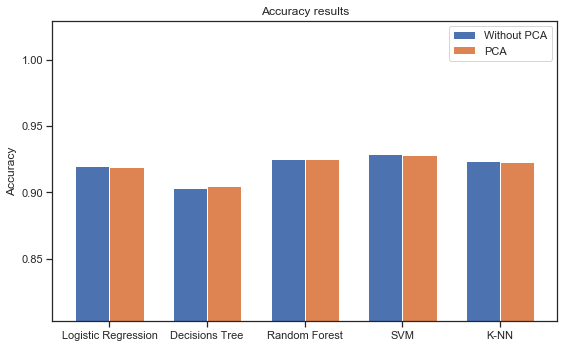

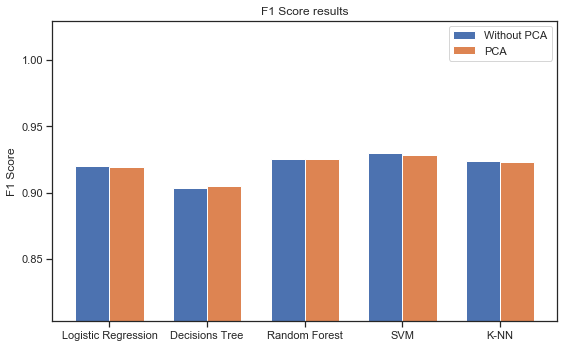

In [115]:
accuracys = [lr_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, knn_accuracy]  
accuracys_pca = [lr_accuracy_pca, dt_accuracy_pca, rf_accuracy_pca, svm_accuracy_pca, knn_accuracy_pca] 
f1_scores = [lr_f1_score, dt_f1_score, rf_f1_score, svm_f1_score, knn_f1_score] 
f1_scores_pca = [lr_f1_score_pca, dt_f1_score_pca, rf_f1_score_pca, svm_f1_score_pca, knn_f1_score_pca] 
plotResult(accuracys, accuracys_pca, f1_scores,f1_scores_pca)

## 5. Conclusions<a name="end">
    
Here is a summary of obtained results:

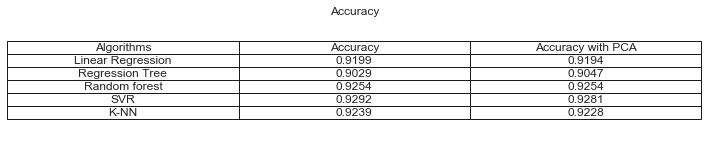

In [122]:
columns = [ 'Algorithms' ,'Accuracy', 'Accuracy with PCA']
values = [['Linear Regression', '{:0.4f}'.format(lr_accuracy), '{:0.4f}'.format(lr_accuracy_pca)],
         ['Regression Tree', '{:0.4f}'.format(dt_accuracy), '{:0.4f}'.format(dt_accuracy_pca)],
         ['Random forest', '{:0.4f}'.format(rf_accuracy), '{:0.4f}'.format(rf_accuracy_pca)],
         ['SVR', '{:0.4f}'.format(svm_accuracy), '{:0.4f}'.format(svm_accuracy_pca)],
         ['K-NN', '{:0.4f}'.format(knn_accuracy), '{:0.4f}'.format(knn_accuracy_pca)]]
fig, ax = plt.subplots(figsize=(10,2))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=values, colLabels=columns, loc='center', cellLoc='center')
fig.tight_layout()
plt.title("Accuracy")
plt.show()

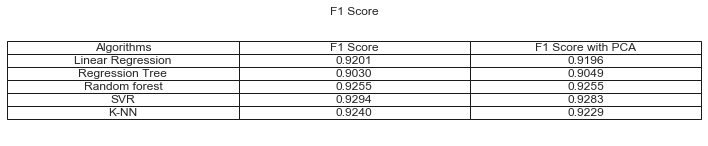

In [121]:
columns = [ 'Algorithms' ,'F1 Score', 'F1 Score with PCA']
values = [['Linear Regression', '{:0.4f}'.format(lr_f1_score), '{:0.4f}'.format(lr_f1_score_pca)],
         ['Regression Tree', '{:0.4f}'.format(dt_f1_score), '{:0.4f}'.format(dt_f1_score_pca)],
         ['Random forest', '{:0.4f}'.format(rf_f1_score), '{:0.4f}'.format(rf_f1_score_pca)],
         ['SVR', '{:0.4f}'.format(svm_f1_score), '{:0.4f}'.format(svm_f1_score_pca)],
         ['K-NN', '{:0.4f}'.format(knn_f1_score), '{:0.4f}'.format(knn_f1_score_pca)]]
fig, ax = plt.subplots(figsize=(10,2))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=values, colLabels=columns, loc='center', cellLoc='center')
fig.tight_layout()
plt.title("F1 Score")
plt.show()

In general, our models performed in similar ways, relatively to each features selection. 

This analysis was based on accuracy and F1 score. Having an unbalanced dataset, F1 score is a better metric to evaluate the models. All models have a hight F1 score and this indicats that their classification are precise and robust.

The main purpose of the dataset was to classify seven different dry beans from features such as form, shape, type, and structure by the market situation. This analysis was obtained good results with all algorithms. In this specific case, the best performing algorithm was Random Forest without PCA and SVR with PCA